In [55]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib

In [56]:
usecols = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

with open('../Lab1/Data/bank-full.csv') as f:
    df = pd.read_csv(f,sep=';',engine='python',encoding='utf-8-sig')
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [57]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
total = df.isnull().sum().sort_values(ascending=False)
percent1 = df.isnull().sum()/df.isnull().count()*100
percent2 = (round(percent1,1)).sort_index(ascending=False)
missing_data = pd.concat(
    [total,percent2],
    axis=1,
    keys=['Total','%']
)
missing_data.head(5)

,Total,%
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


<Axes: xlabel='balance', ylabel='job'>

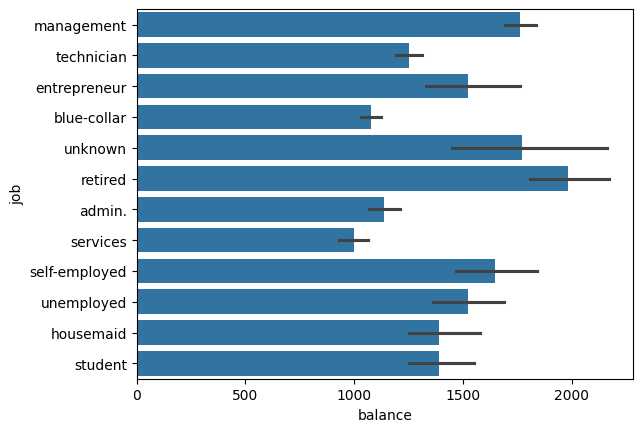

In [60]:
sns.barplot(x='balance',y='job',data=df)

<Axes: xlabel='loan', ylabel='balance'>

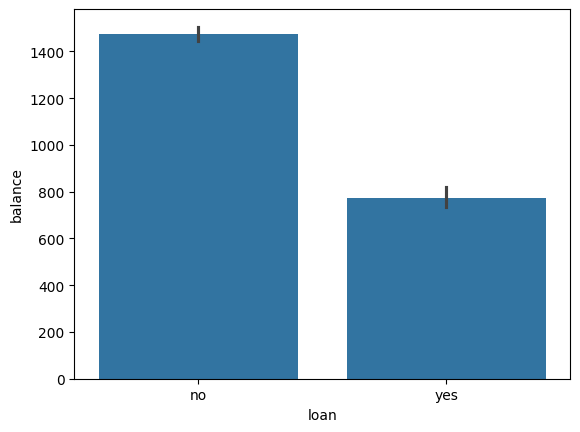

In [61]:
sns.barplot(x='loan',y='balance',data=df)


In [62]:
job = {"admin.":1,"unknown":2,"unemployed":3,"management":4,"housemaid":5,"entrepreneur":6,"student":7,"blue-collar":8,"self-employed":9,"retired":10,"technician":11,"services":12}
for dataset in [df]:
    dataset['job'] = dataset["job"].map(job)
df['job'] = df['job'].astype(int)

In [63]:
marital = {"married":0,"single":1,"divorced":2}
education = {"unknown":0,"primary":1,"secondary":2,"tertiary":3}
binary = {"yes":0,"no":1}
contact = {"unknown":0,"telephone":1,"cellular":2}
month = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
poutcome = {"unknown":0,"success":1,"failure":2,"other":4}
for dataset in [df]:
    dataset['marital'] = dataset["marital"].map(marital)
    dataset['education'] = dataset["education"].map(education)
    dataset['housing'] = dataset["housing"].map(binary)
    dataset['loan'] = dataset["loan"].map(binary)
    dataset['contact'] = dataset["contact"].map(contact)
    dataset['default'] = dataset["default"].map(binary)
    dataset['month'] = dataset["month"].map(month)
    dataset['poutcome'] = dataset["poutcome"].map(poutcome)
    dataset['y'] = dataset["y"].map(binary)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,0,3,1,2143,0,1,0,5,5,261,1,-1,0,0,1
1,44,11,1,2,1,29,0,1,0,5,5,151,1,-1,0,0,1
2,33,6,0,2,1,2,0,0,0,5,5,76,1,-1,0,0,1
3,47,8,0,0,1,1506,0,1,0,5,5,92,1,-1,0,0,1
4,33,2,1,0,1,1,1,1,0,5,5,198,1,-1,0,0,1
5,35,4,0,3,1,231,0,1,0,5,5,139,1,-1,0,0,1
6,28,4,1,3,1,447,0,0,0,5,5,217,1,-1,0,0,1
7,42,6,2,3,0,2,0,1,0,5,5,380,1,-1,0,0,1
8,58,10,0,1,1,121,0,1,0,5,5,50,1,-1,0,0,1
9,43,11,1,2,1,593,0,1,0,5,5,55,1,-1,0,0,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [65]:
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 25, 'age'] = 0
    dataset.loc[(dataset['age'] > 25) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 39), 'age'] = 2
    dataset.loc[(dataset['age'] > 39) & (dataset['age'] <= 46), 'age'] = 3
    dataset.loc[(dataset['age'] > 46) & (dataset['age'] <= 53), 'age'] = 4
    dataset.loc[dataset['age'] > 53, 'age'] = 5

In [66]:
df['age'].value_counts()

age
2    12251
1     9775
3     8576
4     6756
5     6517
0     1336
Name: count, dtype: int64

In [67]:
df['age'].describe()

count    45211.000000
mean         2.645684
std          1.415020
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: age, dtype: float64